In [58]:
import pandas as pd

# Đọc dữ liệu từ tập tin CSV với các tùy chọn
df = pd.read_csv('PUM.DE.1.csv', header=0, parse_dates=[0], index_col=0)

# In ra 5 dòng đầu tiên của DataFrame
print(df.head())


                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2019-01-02  43.000000  43.849998  41.650002  43.400002  41.430092  373340.0
2019-01-03  42.900002  43.299999  42.000000  43.000000  41.048248  340270.0
2019-01-04  43.000000  45.000000  42.750000  44.950001  42.909737  424480.0
2019-01-07  45.400002  45.400002  43.599998  44.250000  42.241508  299950.0
2019-01-08  44.450001  45.500000  44.299999  44.500000  42.480164  371190.0


In [59]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [60]:
# 2.  chia train test theo tỉ lệ 7-3
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.3 * len(df))
#val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
#val_data = df[train_size+test_size:]


In [61]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])


from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)


model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3319.277, Time=1.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3322.497, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3324.493, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3324.493, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3320.688, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3328.472, Time=0.15 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3328.434, Time=0.11 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=3320.796, Time=1.08 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=3320.817, Time=1.17 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3326.182, Time=0.33 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=3330.073, Time=0.40 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=3330.426, Time=0.19 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=3323.239, Time=1.29 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=3317.474, Time=0.46 sec
 ARIMA(1,1,2)(0,0,0)[0]          

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [62]:
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))

#x_val= np.array(val_data.index).reshape(-1, 1)
#y_val = np.array(val_data['Close'])
#y_pred_val =  model.predict(n_periods=len(y_val))

In [63]:
#Dự đoán 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)


x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)


y_next_30_days = model.predict(n_periods=len(x_next_30_days))

print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[64.40655758 64.50714729 64.0011452  64.08304992 64.54323576 64.30112342
 63.94195294 64.30318344 64.52252191 64.09564013 64.03473016 64.46898922
 64.37412436 63.98788564 64.21634622 64.50886076 64.18442796 64.01650172
 64.3896062  64.41985268 64.04844003 64.15069832 64.47356177 64.26039164
 64.02373239 64.31360725 64.43976994 64.1148613  64.10792644 64.42449158]


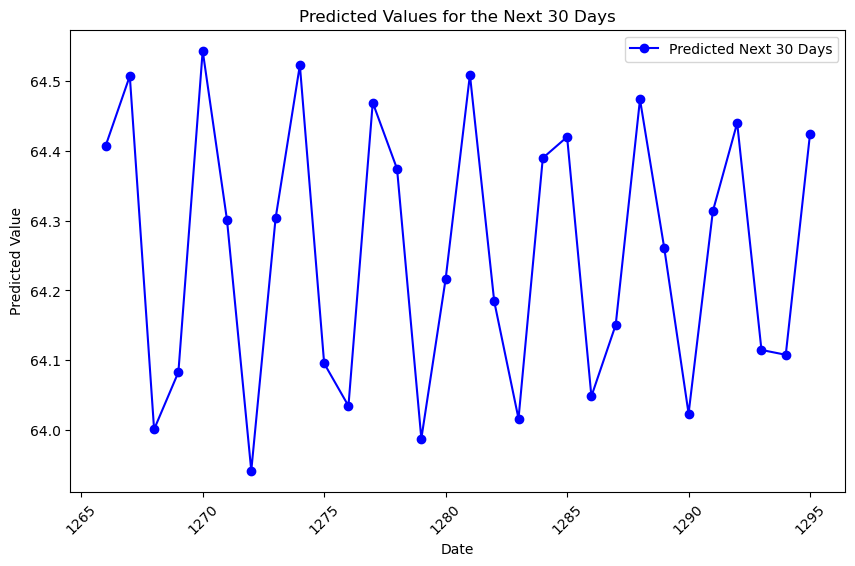

In [64]:
# Vẽ biểu đồ
plt.figure(figsize=(10, 6)) # Set the figure size
plt.plot(x_next_30_days, y_next_30_days, marker='o', color='b', label='Predicted Next 30 Days')

# Đặt tiêu đề và nhãn
plt.title('Predicted Values for the Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Predicted Value')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.legend()

# Hiển thị biểu đồ
plt.show()

In [65]:
# 8. Tính RMSE
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error, mean_squared_error, r2_score
#valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
#print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
# 8+. Tính MAPE 
#valid_mape = mean_absolute_percentage_error(y_val,y_pred_val)
test_mape = mean_absolute_percentage_error(y_test,y_pred)
#print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)
# 8+. Tính MAE
#valid_mae = mean_absolute_error(y_val,y_pred_val)
test_mae = mean_absolute_error(y_test,y_pred)
#print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)
# MSE
#valid_mse = mean_squared_error(y_val, y_pred_val)
test_mse = mean_squared_error(y_test, y_pred)
#print('Validation MSE:', valid_mse)
print('Testing MSE:', test_mse)

Testing RMSE: 9.994072931135634
Testing MAPE: 0.1617710556215828
Testing MAE: 8.436632582437428
Testing MSE: 99.881493752858


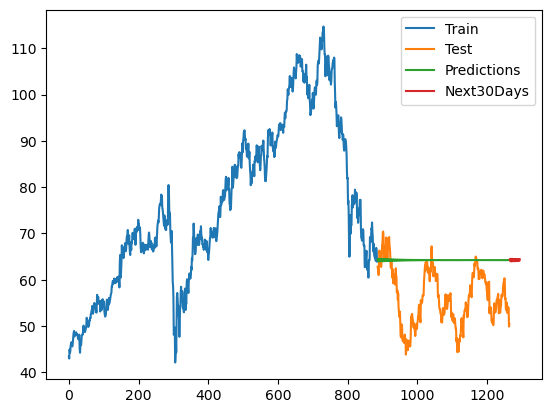

In [66]:
# 9.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
#plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Days'])
plt.show()

In [67]:
#train-test (8-2)

In [68]:
# 2.  chia train test theo tỉ lệ 8-2
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
# Split the data into training, testing, and validation sets
train_size = int(0.8 * len(df))
test_size = int(0.2 * len(df))
#val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
#val_data = df[train_size+test_size:]

In [69]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])


from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)


model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3799.198, Time=0.60 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3791.404, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3793.384, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3793.383, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3789.457, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3795.223, Time=0.20 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.017 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [70]:
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))

#x_val= np.array(val_data.index).reshape(-1, 1)
#y_val = np.array(val_data['Close'])
#y_pred_val =  model.predict(n_periods=len(y_val))

In [71]:
#Dự đoán 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)


x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)


y_next_30_days = model.predict(n_periods=len(x_next_30_days))

print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[55. 55. 55. 55. 55. 55. 55. 55. 55. 55. 55. 55. 55. 55. 55. 55. 55. 55.
 55. 55. 55. 55. 55. 55. 55. 55. 55. 55. 55. 55.]


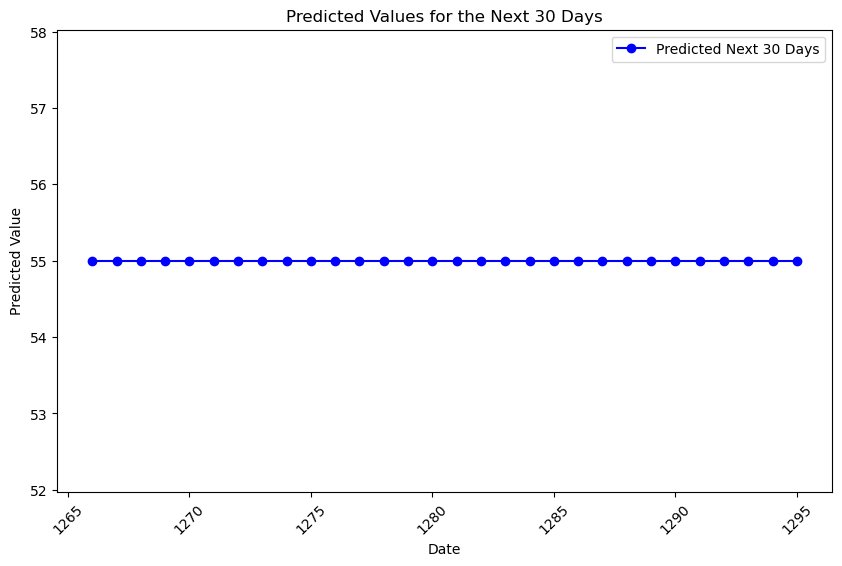

In [72]:
# Vẽ biểu đồ
plt.figure(figsize=(10, 6)) # Set the figure size
plt.plot(x_next_30_days, y_next_30_days, marker='o', color='b', label='Predicted Next 30 Days')

# Đặt tiêu đề và nhãn
plt.title('Predicted Values for the Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Predicted Value')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.legend()

# Hiển thị biểu đồ
plt.show()

In [73]:
# 8. Tính RMSE
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error, mean_squared_error, r2_score
#valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
#print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
# 8+. Tính MAPE 
#valid_mape = mean_absolute_percentage_error(y_val,y_pred_val)
test_mape = mean_absolute_percentage_error(y_test,y_pred)
#print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)
# 8+. Tính MAE
#valid_mae = mean_absolute_error(y_val,y_pred_val)
test_mae = mean_absolute_error(y_test,y_pred)
#print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)
# MSE
#valid_mse = mean_squared_error(y_val, y_pred_val)
test_mse = mean_squared_error(y_test, y_pred)
#print('Validation MSE:', valid_mse)
print('Testing MSE:', test_mse)

Testing RMSE: 4.987324310072052
Testing MAPE: 0.07171829801935739
Testing MAE: 4.069644320158104
Testing MSE: 24.873403773835662


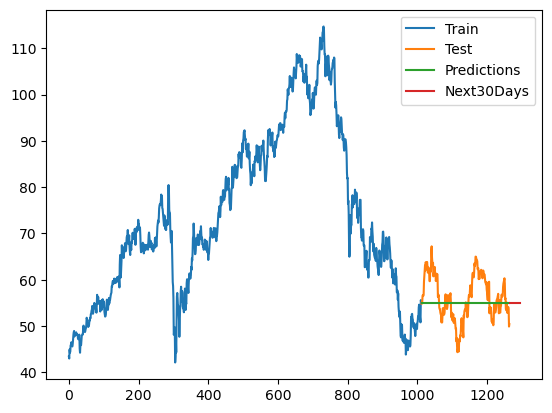

In [74]:
# 9.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
#plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Days'])
plt.show()

In [75]:
#train-test (9-1)

In [76]:
# 2.  chia train test theo tỉ lệ 9-1
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
# Split the data into training, testing, and validation sets
train_size = int(0.9 * len(df))
test_size = int(0.1 * len(df))
#val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
#val_data = df[train_size+test_size:]

In [77]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])


from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)


model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4234.192, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4226.407, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4228.377, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4228.376, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4224.444, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4230.268, Time=0.11 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.551 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [78]:
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))

#x_val= np.array(val_data.index).reshape(-1, 1)
#y_val = np.array(val_data['Close'])
#y_pred_val =  model.predict(n_periods=len(y_val))

In [79]:
#Dự đoán 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)


x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)


y_next_30_days = model.predict(n_periods=len(x_next_30_days))

print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[53.380001 53.380001 53.380001 53.380001 53.380001 53.380001 53.380001
 53.380001 53.380001 53.380001 53.380001 53.380001 53.380001 53.380001
 53.380001 53.380001 53.380001 53.380001 53.380001 53.380001 53.380001
 53.380001 53.380001 53.380001 53.380001 53.380001 53.380001 53.380001
 53.380001 53.380001]


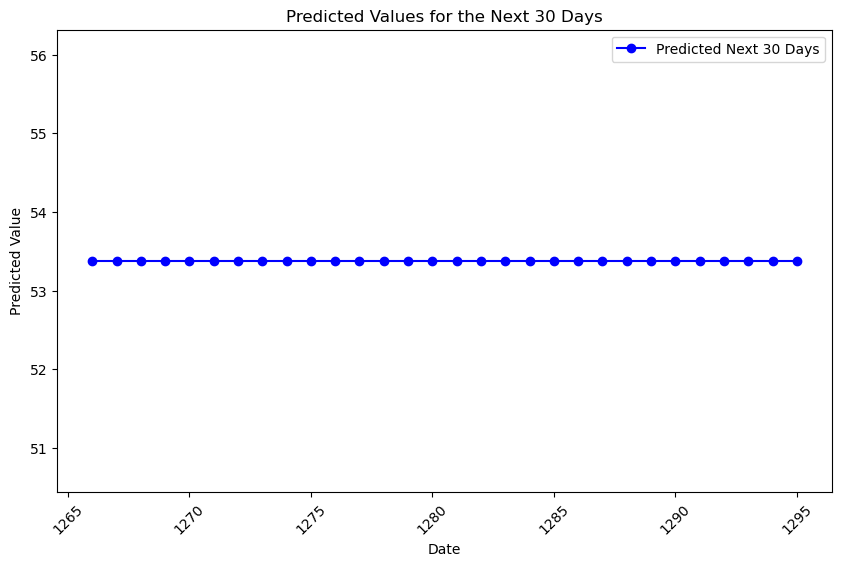

In [80]:
# Vẽ biểu đồ
plt.figure(figsize=(10, 6)) # Set the figure size
plt.plot(x_next_30_days, y_next_30_days, marker='o', color='b', label='Predicted Next 30 Days')

# Đặt tiêu đề và nhãn
plt.title('Predicted Values for the Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Predicted Value')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.legend()

# Hiển thị biểu đồ
plt.show()

In [81]:
# 8. Tính RMSE
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error, mean_squared_error, r2_score
#valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
#print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
# 8+. Tính MAPE 
#valid_mape = mean_absolute_percentage_error(y_val,y_pred_val)
test_mape = mean_absolute_percentage_error(y_test,y_pred)
#print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)
# 8+. Tính MAE
#valid_mae = mean_absolute_error(y_val,y_pred_val)
test_mae = mean_absolute_error(y_test,y_pred)
#print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)
# MSE
#valid_mse = mean_squared_error(y_val, y_pred_val)
test_mse = mean_squared_error(y_test, y_pred)
#print('Validation MSE:', valid_mse)
print('Testing MSE:', test_mse)

Testing RMSE: 5.448239414506385
Testing MAPE: 0.07276212816689666
Testing MAE: 4.3453962301587294
Testing MSE: 29.683312717780872


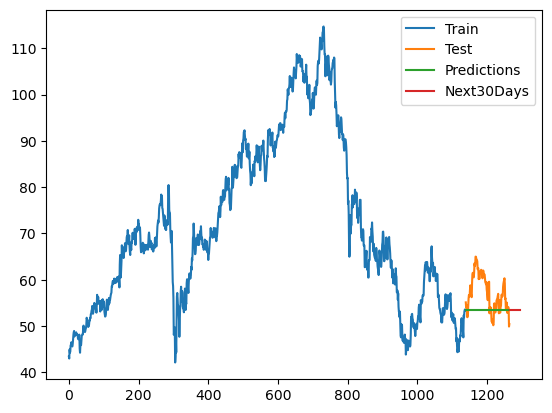

In [82]:
# 9.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
#plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Days'])
plt.show()